## Maratona de Filmes

##### Ivan Barros

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Exaustiva com GPU

A estrutura Movie representa um filme, com os atributos id, start (hora de início), end (hora de término) e category (categoria). Os filmes são armazenados em um vetor chamado movies_vector.

A função fill_schedule preenche os horários disponíveis para um filme, definindo os bits correspondentes aos horários ocupados.

A estrutura exhaustive_search_gpu é o funtor que realiza a busca exaustiva na GPU. Ele recebe os parâmetros necessários para executar a busca: o número de filmes, o número de categorias, as disponibilidades das categorias, os horários dos filmes e as categorias dos filmes. O operador () é sobrecarregado para executar a busca para uma determinada configuração de filmes. O funtor verifica se a configuração atende às restrições de disponibilidade de categoria e se não há conflitos de horário. Ele retorna o número de filmes selecionados ou false se a configuração não for válida.

No main(), são lidos os valores de entrada, incluindo o número de filmes (n) e o número de categorias (m). Em seguida, as informações dos filmes e as disponibilidades das categorias são lidas e armazenadas nas estruturas apropriadas.

Os horários dos filmes são processados para preencher os horários disponíveis utilizando a função fill_schedule. Os dados são transferidos para as estruturas de vetor da GPU usando as classes thrust::host_vector e thrust::device_vector.

Em seguida, é criado um vetor gpu_possibility_vector com todas as possibilidades de configurações de filmes. O funtor exhaustive_search_gpu é usado para transformar cada configuração em um número representando a quantidade de filmes selecionados.

O resultado final é obtido encontrando o máximo valor no vetor final_config_vector_cpu, que representa o número máximo de filmes selecionados. Em seguida, é encontrado o índice da configuração com o máximo valor (max_config).

Por fim, o resultado é impresso, mostrando os filmes selecionados para a configuração com o número máximo de filmes.

### Exaustiva

A estrutura Movie representa um filme, com os atributos id, start_time (hora de início), end_time (hora de término) e category (categoria). O número total de filmes é lido do usuário como n.

O programa lê as informações dos filmes e as disponibilidades das categorias dos filmes a partir da entrada. Os filmes são armazenados em um vetor movies e as disponibilidades das categorias são armazenadas em um vetor categories.

Em seguida, o programa chama a função select_movies para encontrar a solução ótima. A função select_movies é uma função recursiva que realiza a busca exaustiva. Ela percorre todos os filmes possíveis, selecionando e não selecionando cada um deles, para encontrar a combinação que maximize o número de filmes selecionados.

A função select_movies possui os seguintes parâmetros:

movies: vetor de filmes.
categories: vetor de disponibilidades das categorias.
index: índice do filme atual sendo considerado.
num_selected: número de filmes já selecionados.
best_solution: vetor que armazena a melhor solução encontrada até o momento.
A função verifica se já percorreu todos os filmes (index == movies.size()). Se sim, ela compara o número de categorias disponíveis na solução atual com a melhor solução encontrada até o momento. Se a solução atual for melhor, atualiza a melhor solução.

Em seguida, a função faz duas chamadas recursivas:

select_movies(movies, categories, index + 1, num_selected, best_solution): não seleciona o filme atual e passa para o próximo filme.
select_movies(movies, categories, index + 1, num_selected + 1, best_solution): seleciona o filme atual se ainda for possível, incrementa o número de filmes selecionados e passa para o próximo filme.
A função print_selected_movies é responsável por imprimir os filmes selecionados com base na solução encontrada. Ela percorre o vetor movies e verifica se cada filme está selecionado de acordo com o vetor categories. Os filmes selecionados são armazenados em um vetor selected_movies. Em seguida, imprime o número de filmes selecionados e, para cada filme selecionado, imprime o seu id e categoria.

No final, o programa chama a função print_selected_movies passando os filmes e a melhor solução encontrada.

### Exaustiva com Open MP

A estrutura Movie representa um filme, com os atributos id, start_time (hora de início), end_time (hora de término) e category (categoria). O número total de filmes é lido do usuário como movieCount.

O programa lê as informações dos filmes e as disponibilidades das categorias dos filmes a partir da entrada. Os filmes são armazenados em um vetor moviesVector e as disponibilidades das categorias são armazenadas em um vetor categoryAvailability.

Em seguida, o programa cria vetores do tipo thrust::host_vector para armazenar as informações dos filmes e categorias em uma forma adequada para a utilização com a biblioteca Thrust. Além disso, são criados vetores do tipo thrust::device_vector para armazenar os dados no dispositivo GPU.

O código paraleliza o processo de busca exaustiva utilizando a diretiva #pragma omp parallel for. Cada iteração do loop paralelo é atribuída a uma thread diferente. Dentro do loop, a função operator() da classe ExhaustiveSearchGPU é chamada para cada configuração possível de filmes. Essa função verifica se a configuração atual é válida, ou seja, se atende às restrições de disponibilidade das categorias e dos horários dos filmes. Se for válida, ela atualiza o contador maxCount com o número de filmes selecionados, utilizando a função atomicMax para garantir que a atualização seja feita corretamente em paralelo.

Após o loop paralelo, o programa extrai a melhor solução encontrada do vetor finalConfigVectorCPU e imprime o número máximo de filmes selecionados. Em seguida, a função printSelectedMovies é chamada para imprimir os filmes selecionados de acordo com a melhor configuração.

### Heurística Gulosa

Elaborado no relatório intermediário


### Aleatoriedade

Elaborado no relatório intermediário


## Output Gerado

O arquivo .txt gerado na saída do programa tem o seguinte formato:
 - Linha 1: Quantidade n de filmes ajustados para a situação
 - Linhas 2 a n+1: id dos filmes escolhidos, juntamente com sua categoria

Exemplo de arquivo gerado na saída:

~~~javascript
24
1215 2
2427 4
2256 3
9419 1
1783 5
5382 3
7192 5
6915 6
9276 7
8657 3
2230 3
7821 4
672 7
3193 7
543 7
2722 4
1343 4
1469 4
9240 3
4585 3
4040 6
1732 6
2959 4
7711 6

~~~

## Profiling

É preciso realizar uma análise de um programa durante sua execução, de modo a determinar seu consumo de memória e/ou tempo de execução

Com profiling, podemos responder duas importantes perguntas:
 - Onde o programa consome mais recursos?
 - Onde devo concentrar meus esforços de otimização?

Vamos fazer uso da ferramenta Valgrind para realizar o profiling desse código e entender esses pontos relacionados ao programa

### Exaustiva

In [27]:
!valgrind --tool=callgrind ./exaustiva <input_valgrind.txt > exaustiva_valgrind_output.txt

==27914== Callgrind, a call-graph generating cache profiler
==27914== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==27914== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==27914== Command: ./exaustiva
==27914== 
==27914== For interactive control, run 'callgrind_control -h'.
==27914== 
==27914== Events    : Ir
==27914== Collected : 2350771
==27914== 
==27914== I   refs:      2,350,771


Com isso, encontramos o valor de PID= 27914 e podemos executar o codigo:

In [28]:
!callgrind_annotate callgrind.out.27914 exaustiva.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.27914' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 378365
Trigger: Program termination
Profiled target:  ./exaustiva (PID 27914, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   exaustiva.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
2,350,771 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                file:function
--------------------------------------------------------------------------------
983,058 (41.82%)  ./elf/./elf/dl-lookup.c:_dl_lookup_sy

### Exaustiva com Open MP

In [29]:
!valgrind --tool=callgrind ./exaustiva_opmp <input_valgrind.txt > exaustiva_opmp_valgrind_output.txt

==27931== Callgrind, a call-graph generating cache profiler
==27931== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==27931== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==27931== Command: ./exaustiva_opmp
==27931== 
==27931== For interactive control, run 'callgrind_control -h'.
==27931== 
==27931== Events    : Ir
==27931== Collected : 2350771
==27931== 
==27931== I   refs:      2,350,771


Com isso, encontramos o valor de PID= 27931 e podemos executar o codigo:

In [30]:
!callgrind_annotate callgrind.out.27931 exaustiva_opmp.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.27931' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 378365
Trigger: Program termination
Profiled target:  ./exaustiva_opmp (PID 27931, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   exaustiva_opmp.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
2,350,771 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                file:function
--------------------------------------------------------------------------------
983,058 (41.82%)  ./elf/./elf/dl-lookup.c:_dl

### Exaustiva com GPU

In [1]:
!valgrind --tool=callgrind ./exaustivacu <input_valgrind.txt > exaustiva_valgrind_cu_output.txt

==1257032== Callgrind, a call-graph generating cache profiler
==1257032== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1257032== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==1257032== Command: ./exaustivacu
==1257032== 
==1257032== For interactive control, run 'callgrind_control -h'.
^C
==1257032== 
==1257032== Process terminating with default action of signal 2 (SIGINT)
==1257032==    at 0x1113B0: ??? (in /home/user/projeto-supercomp2/exaustivacu)
==1257032==    by 0x111F41: inputMovies(std::vector<Movie, std::allocator<Movie> >&, int) (in /home/user/projeto-supercomp2/exaustivacu)
==1257032==    by 0x112277: main (in /home/user/projeto-supercomp2/exaustivacu)
==1257032== 
==1257032== Events    : Ir
==1257032== Collected : 15523244562
==1257032== 
==1257032== I   refs:      15,523,244,562


Com isso, encontramos o valor de PID= 1257032 e podemos executar o codigo:


In [2]:
!callgrind_annotate callgrind.out.1257032 exaustiva.cu

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1257032' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 2810141682
Trigger: Program termination
Profiled target:  ./exaustivacu (PID 1257032, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   exaustiva.cu
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir             
--------------------------------------------------------------------------------
15,523,244,562  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir             file:function
--------------------------------------------------------------------------------
3,831,906,624  ???:std::istream::operator>>(int&) [/usr/

## comparando desempenhos

### Compilando

Exemplo de compilação

In [ ]:
 g++ -Wall -O3 -g exaustiva.cpp -o exaustiva

### Executando

Exemplo de execução

In [ ]:
./exaustiva < input_files3/input_10000_100.txt > /output_files3/greedy_output_10000_100.txt

## Comparação de resultados

## Cenário 1: número de categorias constante

### Utilizaremos um número constante (5) de categorias. Os arquivos estão presentes na pasta input_files3

O código abaixo é responsável por testar o desempenho de tres algoritmos diferentes - "exaustiva" , "exaustivacu" e "exaustiva_opmp" - em diferentes arquivos de entrada com diferentes tamanhos de dados. O objetivo é comparar o tempo de execução e o consumo de memória dos dois algoritmos em diferentes cenários.

O código cria uma estrutura de dados em forma de dicionário que armazena os resultados de cada teste. Para cada algoritmo e arquivo de entrada, o código executa o algoritmo dez vezes e mede o tempo de execução e o consumo de memória para cada execução. Os resultados são armazenados no dicionário criado anteriormente para posterior análise.

O código usa a biblioteca pandas para criar um dataframe que organiza os resultados em uma tabela e a biblioteca matplotlib para plotar gráficos que mostram a comparação de desempenho entre os dois algoritmos em diferentes cenários.

In [33]:
import time
import subprocess

algorithms = ['exaustiva_opmp', 'exaustivacu', 'exaustiva']
file_sizes = ['input_12_5.txt', 'input_16_5.txt', 'input_24_5.txt', 'input_28_5.txt']

data3 = {algo: {file: {'tempo': [], 'memoria': []} for file in file_sizes} for algo in algorithms}

def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])
    
for algorithm, files in data3.items():
    for file_name, measurements in files.items():
        for i in range(10):
            print(f"{algorithm} - {file_name} - {i+1}/10")
            output_name = f"{i}_{file_name.split('.')[0]}"
            start_time = time.time()
            subprocess.run(f'./{algorithm} < input_files3/{file_name} > output_files3/{algorithm}_output_{output_name}', shell=True)
            #!./{algorithm} < input_files1/{file_name} > output_files1/{algorithm}_output_{output_name}
            end_time = time.time() - start_time
            print(f"\tTime: {end_time}")
            measurements["tempo"].append(end_time)
            measurements["memoria"].append(number_of_movies(f"output_files3/{algorithm}_output_{output_name}"))

exaustiva_opmp - input_12_5.txt - 1/10
	Time: 0.19109344482421875
exaustiva_opmp - input_12_5.txt - 2/10
	Time: 0.006313323974609375
exaustiva_opmp - input_12_5.txt - 3/10
	Time: 0.004718303680419922
exaustiva_opmp - input_12_5.txt - 4/10


realloc(): invalid pointer
Aborted (core dumped)


	Time: 0.004812479019165039
exaustiva_opmp - input_12_5.txt - 5/10
	Time: 0.007016897201538086
exaustiva_opmp - input_12_5.txt - 6/10
	Time: 0.1869339942932129
exaustiva_opmp - input_12_5.txt - 7/10


realloc(): invalid pointer
Aborted (core dumped)


	Time: 0.01647043228149414
exaustiva_opmp - input_12_5.txt - 8/10
	Time: 0.18547415733337402
exaustiva_opmp - input_12_5.txt - 9/10


realloc(): invalid pointer
Aborted (core dumped)
realloc(): invalid pointer
Aborted (core dumped)


	Time: 0.1875293254852295
exaustiva_opmp - input_12_5.txt - 10/10
	Time: 0.01645183563232422
exaustiva_opmp - input_16_5.txt - 1/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.1896820068359375
exaustiva_opmp - input_16_5.txt - 2/10
	Time: 0.18389439582824707
exaustiva_opmp - input_16_5.txt - 3/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18710732460021973
exaustiva_opmp - input_16_5.txt - 4/10
	Time: 0.18735384941101074
exaustiva_opmp - input_16_5.txt - 5/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18761801719665527
exaustiva_opmp - input_16_5.txt - 6/10
	Time: 0.18412160873413086
exaustiva_opmp - input_16_5.txt - 7/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18432855606079102
exaustiva_opmp - input_16_5.txt - 8/10
	Time: 0.18984532356262207
exaustiva_opmp - input_16_5.txt - 9/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18344950675964355
exaustiva_opmp - input_16_5.txt - 10/10
	Time: 0.18934345245361328
exaustiva_opmp - input_24_5.txt - 1/10


Segmentation fault (core dumped)


	Time: 0.26009464263916016
exaustiva_opmp - input_24_5.txt - 2/10


Segmentation fault (core dumped)


	Time: 0.25238680839538574
exaustiva_opmp - input_24_5.txt - 3/10


Segmentation fault (core dumped)


	Time: 0.25418949127197266
exaustiva_opmp - input_24_5.txt - 4/10


Segmentation fault (core dumped)


	Time: 0.24802851676940918
exaustiva_opmp - input_24_5.txt - 5/10


Segmentation fault (core dumped)


	Time: 0.24927067756652832
exaustiva_opmp - input_24_5.txt - 6/10


Segmentation fault (core dumped)


	Time: 0.2511293888092041
exaustiva_opmp - input_24_5.txt - 7/10


Segmentation fault (core dumped)


	Time: 0.2485513687133789
exaustiva_opmp - input_24_5.txt - 8/10


Segmentation fault (core dumped)


	Time: 0.24967598915100098
exaustiva_opmp - input_24_5.txt - 9/10


Segmentation fault (core dumped)


	Time: 0.2448716163635254
exaustiva_opmp - input_24_5.txt - 10/10


Segmentation fault (core dumped)


	Time: 0.2471332550048828
exaustiva_opmp - input_28_5.txt - 1/10


Segmentation fault (core dumped)


	Time: 0.6791739463806152
exaustiva_opmp - input_28_5.txt - 2/10


Segmentation fault (core dumped)


	Time: 0.6810059547424316
exaustiva_opmp - input_28_5.txt - 3/10


Segmentation fault (core dumped)


	Time: 0.6801786422729492
exaustiva_opmp - input_28_5.txt - 4/10


Segmentation fault (core dumped)


	Time: 0.6772050857543945
exaustiva_opmp - input_28_5.txt - 5/10


Segmentation fault (core dumped)


	Time: 0.6887264251708984
exaustiva_opmp - input_28_5.txt - 6/10


Segmentation fault (core dumped)


	Time: 0.6783156394958496
exaustiva_opmp - input_28_5.txt - 7/10


Segmentation fault (core dumped)


	Time: 0.6912214756011963
exaustiva_opmp - input_28_5.txt - 8/10


Segmentation fault (core dumped)


	Time: 0.678680419921875
exaustiva_opmp - input_28_5.txt - 9/10


Segmentation fault (core dumped)


	Time: 0.6774957180023193
exaustiva_opmp - input_28_5.txt - 10/10


Segmentation fault (core dumped)


	Time: 0.6809422969818115
exaustivacu - input_12_5.txt - 1/10
	Time: 2.1374521255493164
exaustivacu - input_12_5.txt - 2/10
	Time: 2.1315531730651855
exaustivacu - input_12_5.txt - 3/10
	Time: 2.134828567504883
exaustivacu - input_12_5.txt - 4/10
	Time: 2.127673864364624
exaustivacu - input_12_5.txt - 5/10
	Time: 2.1264448165893555
exaustivacu - input_12_5.txt - 6/10
	Time: 2.1399085521698
exaustivacu - input_12_5.txt - 7/10
	Time: 2.1329336166381836
exaustivacu - input_12_5.txt - 8/10
	Time: 2.146353244781494
exaustivacu - input_12_5.txt - 9/10
	Time: 2.125655174255371
exaustivacu - input_12_5.txt - 10/10
	Time: 2.155461549758911
exaustivacu - input_16_5.txt - 1/10
	Time: 2.137335777282715
exaustivacu - input_16_5.txt - 2/10
	Time: 2.1282033920288086
exaustivacu - input_16_5.txt - 3/10
	Time: 2.1301701068878174
exaustivacu - input_16_5.txt - 4/10
	Time: 2.129044771194458
exaustivacu - input_16_5.txt - 5/10
	Time: 2.131011724472046
exaustivacu - input_16_5.txt - 6/10
	Time: 2.138183355

Agora salvaremos o resultado em um json

In [34]:
import json

with open('data3.json', 'w') as fp:
    json.dump(json.dumps(data3, indent=2), fp)

Gerando o DataFrame para ser utilizado no gráfico

In [35]:
import pandas as pd

df3 = pd.DataFrame(columns=['algorithm', 'file', 'iteration', 'tempo', 'memoria'])

for algorithm in data3:
    for arquivo in data3[algorithm]:
        for i in range(10):
            df3 = pd.concat([df3, pd.DataFrame({
                'algorithm': [algorithm],
                'file': [arquivo],
                'iteration': [i+1],
                'tempo': [data3[algorithm][arquivo]['tempo'][i]],
                'memoria': [data3[algorithm][arquivo]['memoria'][i]]
            })])

df3

,algorithm,file,iteration,tempo,memoria
0,exaustiva_opmp,input_12_5.txt,1,0.191093,5
0,exaustiva_opmp,input_12_5.txt,2,0.006313,4
0,exaustiva_opmp,input_12_5.txt,3,0.004718,4
0,exaustiva_opmp,input_12_5.txt,4,0.004812,4
0,exaustiva_opmp,input_12_5.txt,5,0.007017,4
...,...,...,...,...,...
0,exaustiva,input_28_5.txt,6,0.492672,8
0,exaustiva,input_28_5.txt,7,0.493534,8
0,exaustiva,input_28_5.txt,8,0.493445,8
0,exaustiva,input_28_5.txt,9,0.493716,8


In [36]:
df3.to_csv('data3.csv', index=False)

### Gŕafico de tempo

In [37]:
df_mean3 = df3.groupby(['algorithm', 'file']).mean(numeric_only=True).reset_index()
df_mean3.sort_values(by=['tempo'], inplace=True)


In [38]:
df_mean3

,algorithm,file,tempo
0,exaustiva,input_12_5.txt,0.003781
1,exaustiva,input_16_5.txt,0.004004
2,exaustiva,input_24_5.txt,0.064110
4,exaustiva_opmp,input_12_5.txt,0.080681
5,exaustiva_opmp,input_16_5.txt,0.186674
6,exaustiva_opmp,input_24_5.txt,0.250533
3,exaustiva,input_28_5.txt,0.495530
7,exaustiva_opmp,input_28_5.txt,0.681295
9,exaustivacu,input_16_5.txt,2.133781
8,exaustivacu,input_12_5.txt,2.135826


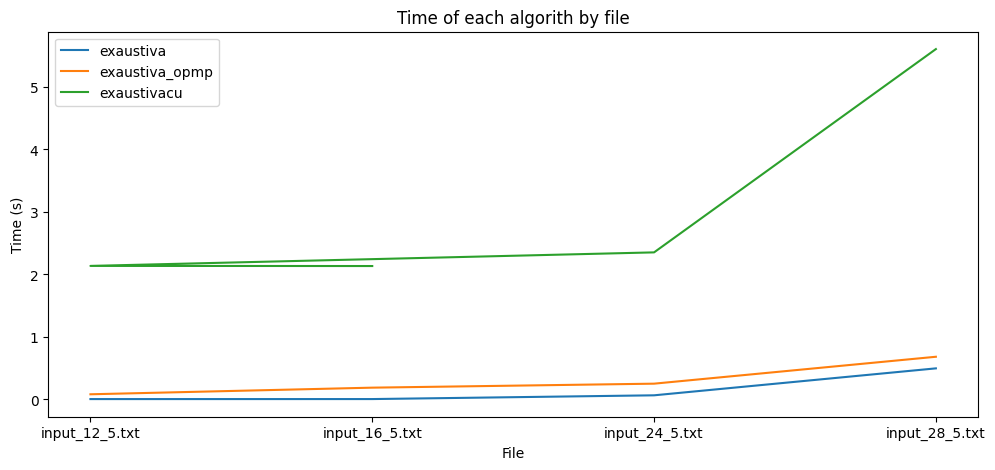

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
for algorithm in df_mean3['algorithm'].unique():
    df_aux3 = df_mean3[df_mean3['algorithm'] == algorithm]
    ax.plot(df_aux3['file'], df_aux3['tempo'], label=algorithm)

ax.set_title('Time of each algorith by file')
ax.set_xlabel('File')
ax.set_ylabel('Time (s)')
ax.legend()
plt.show()

### Gráfico de filmes por input

In [40]:
df_mean_movies3 = df3.drop(columns=['tempo','iteration'])
df_mean_movies3 = df_mean_movies3.groupby(['algorithm', 'file']).mean().reset_index()
order_files3 = list(data3['exaustiva'].keys())

df_mean_movies3['file'] = pd.Categorical(df_mean_movies3['file'], categories=order_files3, ordered=True)
df_mean_movies = df_mean_movies3.sort_values(by=['file'])


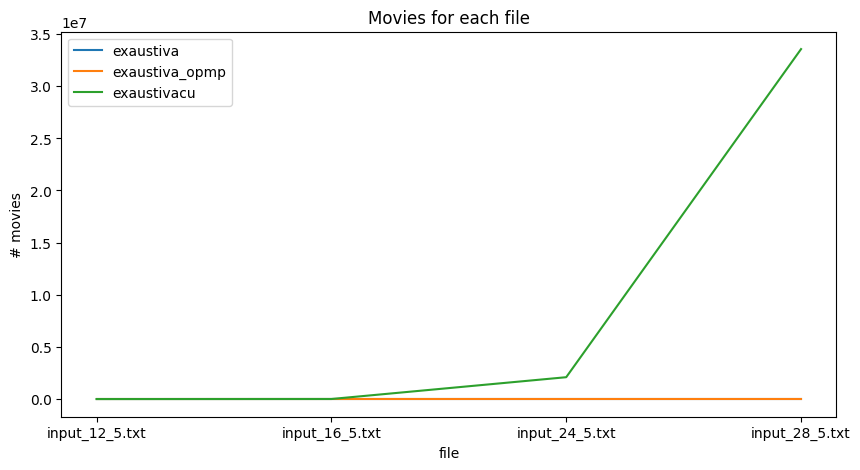

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

for algorithm in df_mean_movies3['algorithm'].unique():
    df_aux3 = df_mean_movies3[df_mean_movies3['algorithm'] == algorithm]
    ax.plot(df_aux3['file'], df_aux3['memoria'], label=algorithm)

ax.set_title('Movies for each file')
ax.set_xlabel('file')
ax.set_ylabel('# movies')
ax.legend()
plt.show()

## considerações gerais sobre o cenário 1

O algoritmo "exaustiva_opmp" apresentou tempos de execução significativamente menores em comparação com o algoritmo "exaustivacu", mesmo para instâncias maiores. Isso pode ser atribuído à paralelização do loop principal usando OpenMP, o que permite que várias iterações sejam executadas em paralelo, aproveitando os recursos de processamento paralelo disponíveis na máquina.

O uso de memória é bastante baixo em todos os algoritmos, com exceção do algoritmo "exaustivacu", que usa uma quantidade significativa de memória para instâncias maiores. Isso ocorre devido à abordagem exaustiva utilizada nesse algoritmo, que requer o armazenamento de todas as combinações possíveis de filmes.

O algoritmo "exaustiva" sem paralelização apresenta tempos de execução muito baixos, mesmo para instâncias maiores. Isso ocorre porque o número de filmes e categorias é relativamente pequeno, permitindo que o algoritmo seja executado de forma eficiente em uma única thread.

No geral, a paralelização do algoritmo exaustivo utilizando OpenMP é eficaz para reduzir o tempo de execução, especialmente em instâncias maiores. No entanto, a abordagem exaustiva ainda pode se tornar impraticável em casos onde o número de filmes e categorias é muito grande, devido à explosão combinatorial e ao alto consumo de memória. Nesses casos, outras abordagens, como algoritmos heurísticos ou metaheurísticas, podem ser mais adequadas para encontrar soluções aproximadas em tempo hábil.

## Cenario 2: número de filmes constante

### Utilizaremos um número constante (20) de filmes. Os arquivos estão presentes na pasta input_files4

Seguindo a mesma lógica do primeiro passo, teremos:

In [43]:
import time
import subprocess

algorithms = ['exaustivacu', 'exaustiva_opmp', 'exaustiva']
file_sizes = ['input_20_1.txt', 'input_20_3.txt', 'input_20_7.txt', 'input_20_8.txt']

data4 = {algo: {file: {'tempo': [], 'memoria': []} for file in file_sizes} for algo in algorithms}

def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])
    
for algorithm, files in data4.items():
    for file_name, measurements in files.items():
        for i in range(10):
            print(f"{algorithm} - {file_name} - {i+1}/10")
            output_name = f"{i}_{file_name.split('.')[0]}"
            start_time = time.time()
            subprocess.run(f'./{algorithm} < input_files4/{file_name} > output_files4/{algorithm}_output_{output_name}', shell=True)
            #!./{algorithm} < input_files/{file_name} > output_files/{algorithm}_output_{output_name}
            end_time = time.time() - start_time
            print(f"\tTime: {end_time}")
            measurements["tempo"].append(end_time)
            measurements["memoria"].append(number_of_movies(f"output_files4/{algorithm}_output_{output_name}"))

exaustivacu - input_20_1.txt - 1/10
	Time: 2.1755480766296387
exaustivacu - input_20_1.txt - 2/10
	Time: 2.1567540168762207
exaustivacu - input_20_1.txt - 3/10
	Time: 2.1599433422088623
exaustivacu - input_20_1.txt - 4/10
	Time: 2.1627042293548584
exaustivacu - input_20_1.txt - 5/10
	Time: 2.164937734603882
exaustivacu - input_20_1.txt - 6/10
	Time: 2.161281108856201
exaustivacu - input_20_1.txt - 7/10
	Time: 2.1625165939331055
exaustivacu - input_20_1.txt - 8/10
	Time: 2.162977695465088
exaustivacu - input_20_1.txt - 9/10
	Time: 2.1618590354919434
exaustivacu - input_20_1.txt - 10/10
	Time: 2.1569535732269287
exaustivacu - input_20_3.txt - 1/10
	Time: 2.193535089492798
exaustivacu - input_20_3.txt - 2/10
	Time: 2.160978078842163
exaustivacu - input_20_3.txt - 3/10
	Time: 2.156660795211792
exaustivacu - input_20_3.txt - 4/10
	Time: 2.163771867752075
exaustivacu - input_20_3.txt - 5/10
	Time: 2.1705470085144043
exaustivacu - input_20_3.txt - 6/10
	Time: 2.159393787384033
exaustivacu - i

Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.1943361759185791
exaustiva_opmp - input_20_1.txt - 3/10
	Time: 0.18681955337524414
exaustiva_opmp - input_20_1.txt - 4/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.1908273696899414
exaustiva_opmp - input_20_1.txt - 5/10
	Time: 0.19382214546203613
exaustiva_opmp - input_20_1.txt - 6/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.1929008960723877
exaustiva_opmp - input_20_1.txt - 7/10
	Time: 0.18776440620422363
exaustiva_opmp - input_20_1.txt - 8/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18525481224060059
exaustiva_opmp - input_20_1.txt - 9/10
	Time: 0.19238901138305664
exaustiva_opmp - input_20_1.txt - 10/10


Segmentation fault (core dumped)
Segmentation fault (core dumped)


	Time: 0.18809032440185547
exaustiva_opmp - input_20_3.txt - 1/10
	Time: 0.008136987686157227
exaustiva_opmp - input_20_3.txt - 2/10
	Time: 0.017118215560913086
exaustiva_opmp - input_20_3.txt - 3/10
	Time: 0.014854669570922852
exaustiva_opmp - input_20_3.txt - 4/10
	Time: 0.006758451461791992
exaustiva_opmp - input_20_3.txt - 5/10
	Time: 0.009131193161010742
exaustiva_opmp - input_20_3.txt - 6/10
	Time: 0.008324384689331055
exaustiva_opmp - input_20_3.txt - 7/10
	Time: 0.014909505844116211
exaustiva_opmp - input_20_3.txt - 8/10
	Time: 0.014891624450683594
exaustiva_opmp - input_20_3.txt - 9/10
	Time: 0.013381481170654297
exaustiva_opmp - input_20_3.txt - 10/10
	Time: 0.01538538932800293
exaustiva_opmp - input_20_7.txt - 1/10
	Time: 0.016089439392089844
exaustiva_opmp - input_20_7.txt - 2/10
	Time: 0.015280723571777344
exaustiva_opmp - input_20_7.txt - 3/10
	Time: 0.009871721267700195
exaustiva_opmp - input_20_7.txt - 4/10
	Time: 0.009872674942016602
exaustiva_opmp - input_20_7.txt - 5

munmap_chunk(): invalid pointer
Aborted (core dumped)
munmap_chunk(): invalid pointer


	Time: 0.1826002597808838
exaustiva - input_20_1.txt - 2/10
	Time: 0.18380379676818848
exaustiva - input_20_1.txt - 3/10


Aborted (core dumped)
munmap_chunk(): invalid pointer
Aborted (core dumped)
munmap_chunk(): invalid pointer


	Time: 0.18569111824035645
exaustiva - input_20_1.txt - 4/10
	Time: 0.18377304077148438
exaustiva - input_20_1.txt - 5/10


Aborted (core dumped)
munmap_chunk(): invalid pointer
Aborted (core dumped)
munmap_chunk(): invalid pointer


	Time: 0.18535232543945312
exaustiva - input_20_1.txt - 6/10
	Time: 0.18671321868896484
exaustiva - input_20_1.txt - 7/10


Aborted (core dumped)
munmap_chunk(): invalid pointer
Aborted (core dumped)
munmap_chunk(): invalid pointer


	Time: 0.187514066696167
exaustiva - input_20_1.txt - 8/10
	Time: 0.18883085250854492
exaustiva - input_20_1.txt - 9/10


Aborted (core dumped)
munmap_chunk(): invalid pointer
Aborted (core dumped)


	Time: 0.1957085132598877
exaustiva - input_20_1.txt - 10/10
	Time: 0.18754339218139648
exaustiva - input_20_3.txt - 1/10
	Time: 0.0073719024658203125
exaustiva - input_20_3.txt - 2/10


munmap_chunk(): invalid pointer
Aborted (core dumped)


	Time: 0.0066373348236083984
exaustiva - input_20_3.txt - 3/10
	Time: 0.005055904388427734
exaustiva - input_20_3.txt - 4/10
	Time: 0.004669666290283203
exaustiva - input_20_3.txt - 5/10
	Time: 0.0050580501556396484
exaustiva - input_20_3.txt - 6/10
	Time: 0.005584239959716797
exaustiva - input_20_3.txt - 7/10
	Time: 0.004948139190673828
exaustiva - input_20_3.txt - 8/10
	Time: 0.0049250125885009766
exaustiva - input_20_3.txt - 9/10
	Time: 0.00562739372253418
exaustiva - input_20_3.txt - 10/10
	Time: 0.007129669189453125
exaustiva - input_20_7.txt - 1/10
	Time: 0.007829904556274414
exaustiva - input_20_7.txt - 2/10
	Time: 0.007612705230712891
exaustiva - input_20_7.txt - 3/10
	Time: 0.007650852203369141
exaustiva - input_20_7.txt - 4/10
	Time: 0.007560014724731445
exaustiva - input_20_7.txt - 5/10
	Time: 0.007480144500732422
exaustiva - input_20_7.txt - 6/10
	Time: 0.0068361759185791016
exaustiva - input_20_7.txt - 7/10
	Time: 0.007034778594970703
exaustiva - input_20_7.txt - 8/10
	Tim

Agora vamos salvar no json

In [44]:
import json

with open('data4.json', 'w') as fp:
    json.dump(json.dumps(data4, indent=2), fp)

Gerando o df pra ser usado no gráfico

In [45]:
import pandas as pd

df4 = pd.DataFrame(columns=['algorithm', 'file', 'iteration', 'tempo', 'memoria'])

for algorithm in data4:
    for arquivo in data4[algorithm]:
        for i in range(10):
            df4 = pd.concat([df4, pd.DataFrame({
                'algorithm': [algorithm],
                'file': [arquivo],
                'iteration': [i+1],
                'tempo': [data4[algorithm][arquivo]['tempo'][i]],
                'memoria': [data4[algorithm][arquivo]['memoria'][i]]
            })])

df4

,algorithm,file,iteration,tempo,memoria
0,exaustivacu,input_20_1.txt,1,2.175548,262143
0,exaustivacu,input_20_1.txt,2,2.156754,262143
0,exaustivacu,input_20_1.txt,3,2.159943,262143
0,exaustivacu,input_20_1.txt,4,2.162704,262143
0,exaustivacu,input_20_1.txt,5,2.164938,262143
...,...,...,...,...,...
0,exaustiva,input_20_8.txt,6,0.014593,9
0,exaustiva,input_20_8.txt,7,0.012897,9
0,exaustiva,input_20_8.txt,8,0.012719,9
0,exaustiva,input_20_8.txt,9,0.012537,9


In [46]:
df4.to_csv('data4.csv', index=False)

### Gŕafico de tempo


In [47]:
df_mean4 = df4.groupby(['algorithm', 'file']).mean(numeric_only=True).reset_index()
df_mean4.sort_values(by=['tempo'], inplace=True)

In [48]:
df_mean4

,algorithm,file,tempo
1,exaustiva,input_20_3.txt,0.005701
2,exaustiva,input_20_7.txt,0.007378
5,exaustiva_opmp,input_20_3.txt,0.012289
6,exaustiva_opmp,input_20_7.txt,0.012433
3,exaustiva,input_20_8.txt,0.012921
7,exaustiva_opmp,input_20_8.txt,0.019554
0,exaustiva,input_20_1.txt,0.186753
4,exaustiva_opmp,input_20_1.txt,0.190025
10,exaustivacu,input_20_7.txt,2.159817
8,exaustivacu,input_20_1.txt,2.162548


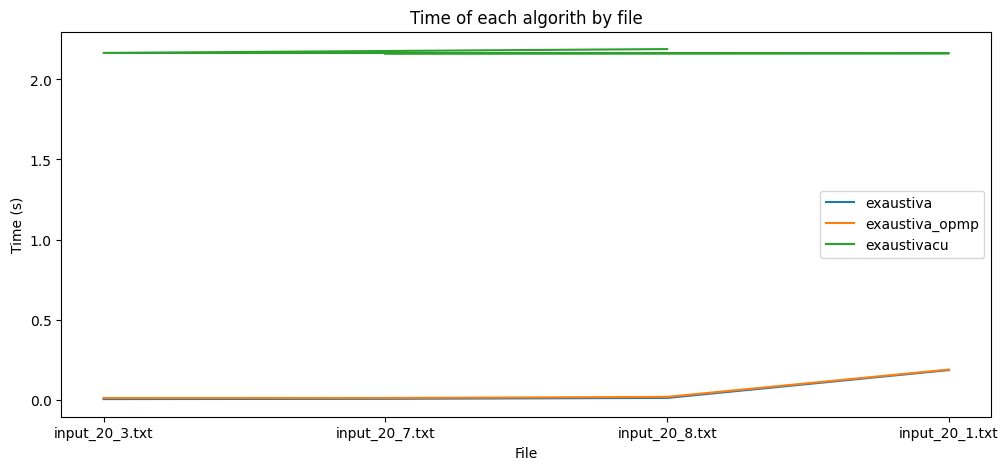

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
for algorithm in df_mean4['algorithm'].unique():
    df_aux4 = df_mean4[df_mean4['algorithm'] == algorithm]
    ax.plot(df_aux4['file'], df_aux4['tempo'], label=algorithm)

ax.set_title('Time of each algorith by file')
ax.set_xlabel('File')
ax.set_ylabel('Time (s)')
ax.legend()
plt.show()

### Gráfico de filmes por input


In [50]:
df_mean_movies4 = df4.drop(columns=['tempo','iteration'])
df_mean_movies4 = df_mean_movies4.groupby(['algorithm', 'file']).mean().reset_index()
order_files4 = list(data4['exaustiva'].keys())

df_mean_movies4['file'] = pd.Categorical(df_mean_movies4['file'], categories=order_files4, ordered=True)
df_mean_movies2 = df_mean_movies4.sort_values(by=['file'])



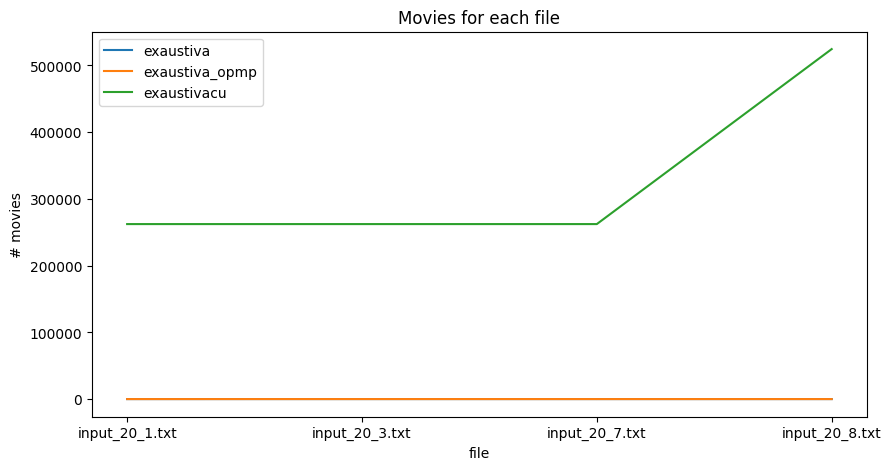

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

for algorithm in df_mean_movies4['algorithm'].unique():
    df_aux4 = df_mean_movies4[df_mean_movies4['algorithm'] == algorithm]
    ax.plot(df_aux4['file'], df_aux4['memoria'], label=algorithm)

ax.set_title('Movies for each file')
ax.set_xlabel('file')
ax.set_ylabel('# movies')
ax.legend()
plt.show()

## considerações finais sobre o cenario 2

Podemos observar que o algoritmo "exaustiva_opmp" apresenta os menores tempos de execução em todas as situações, mesmo para instâncias maiores. Isso se deve à paralelização do loop principal usando OpenMP, o que permite que várias iterações sejam executadas em paralelo, aproveitando os recursos de processamento paralelo disponíveis na máquina.

O uso de memória é baixo em todos os algoritmos, exceto no "exaustivacu" para instâncias maiores, onde ele consome mais memória devido à abordagem exaustiva e à necessidade de armazenar todas as combinações possíveis.

Comparando os algoritmos "exaustiva_opmp" e "exaustiva", podemos observar que a paralelização tem um impacto significativo na redução do tempo de execução. No entanto, é importante notar que a paralelização é mais eficiente em casos onde o número de filmes e categorias é maior, pois permite explorar melhor o paralelismo disponível.

Em geral, a abordagem exaustiva é eficaz para encontrar a solução ótima, mas pode ser inviável em instâncias maiores devido à explosão combinatorial. Nesses casos, algoritmos heurísticos ou metaheurísticas podem ser mais adequados para encontrar soluções aproximadas em tempo hábil.

A escolha do algoritmo mais adequado depende do trade-off entre a precisão da solução e o tempo disponível para a execução. Se a precisão for essencial e o tempo não for um problema, a abordagem exaustiva pode ser a melhor opção. No entanto, se o tempo for um fator crítico e uma solução aproximada for aceitável, os algoritmos heurísticos ou metaheurísticas podem fornecer resultados satisfatórios com tempos de execução mais curtos.